In [1]:
import numpy as np
import matplotlib.pyplot as plt

# PCA

### Fit

1. Center the data using the means
2. Calculate covariance matrix
3. Calculate eigenvalues and eigenvectors of covariance matrix
4. Sort the eigenvalues and eigenvectors in decreasing order
5. Store the first $n$ eigenvectors to be principal components

### Transform

1. Project the data onto the principal components

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification

def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.03  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

In [3]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, X):

        # Center the data using mean
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # Calculate covariance matrix
        cov = np.cov(X.T)

        # Calculate eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T

        # Sort the eigenvalues and eigenvectors in decreasing order
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues, eigenvectors = eigenvalues[idxs], eigenvectors[idxs]

        # Store the first n eigenvectors
        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # Project the centered data onto the principal components
        return np.dot(X - self.mean, self.components.T)
    
    def fit_transform(self, X):

        self.fit(X)
        return self.transform(X)

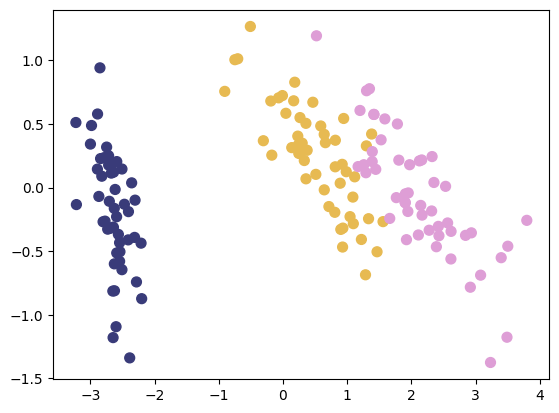

In [4]:
from sklearn import datasets

data = datasets.load_iris()
X, y = data.data, data.target

pca = PCA(n_components=2)
z = pca.fit_transform(X)
plot_2d_clf_problem(z, y)